## Task-1 Python code that convert json into yolo format

In [20]:
import json

def vgg_to_yolo(vgg_annotation):
    images = vgg_annotation['_via_img_metadata']
    
    yolo_annotations = []
    for image_id, image_data in images.items():
        filename = image_data['filename']
        width = image_data['size']
        height = image_data['size']
        annotations = image_data['regions']
        
        for annotation in annotations:
            shape_attributes = annotation['shape_attributes']
            region_attributes = annotation['region_attributes']
            
            label = region_attributes['name']
            x = shape_attributes['x']
            y = shape_attributes['y']
            w = shape_attributes['width']
            h = shape_attributes['height']
            
            x_center = (x + w / 2) / width
            y_center = (y + h / 2) / height
            bbox_width = w / width
            bbox_height = h / height
            
            yolo_annotation = {
                'label': label,
                'x_center': x_center,
                'y_center': y_center,
                'width': bbox_width,
                'height': bbox_height
            }
            yolo_annotations.append(yolo_annotation)
    
    return yolo_annotations

# Load VGG annotation file
with open('C:/Users/Faisal/Downloads/cat_dog_json/cat_dog_annotation.json', 'r') as file:
    vgg_annotation = json.load(file)

# Convert VGG annotation to YOLO format
yolo_annotations = vgg_to_yolo(vgg_annotation)

# Save YOLO annotations to a file
with open('C:/Users/Faisal/Downloads/cat_dog_json/annotations.txt', 'w') as file:
    for annotation in yolo_annotations:
        line = f"{annotation['label']} {annotation['x_center']} {annotation['y_center']} {annotation['width']} {annotation['height']}\n"
        file.write(line)


## Task-2 Python code that convert json file into coco format

In [21]:
import json

def vgg_to_coco(vgg_annotation):
    images = vgg_annotation['_via_img_metadata']
    
    coco_annotations = {
        'info': {},
        'licenses': [],
        'categories': [],
        'images': [],
        'annotations': []
    }
    
    category_mapping = {}
    category_id = 0
    annotation_id = 1
    
    for image_id, image_data in images.items():
        filename = image_data['filename']
        width = image_data['size']
        height = image_data['size']
        annotations = image_data['regions']
        
        # Extract the numeric part of the image ID
        image_id = int(image_id.split('.')[0])
        
        # Add image information
        image_info = {
            'id': image_id,
            'file_name': filename,
            'width': width,
            'height': height,
        }
        coco_annotations['images'].append(image_info)
        
        for annotation in annotations:
            shape_attributes = annotation['shape_attributes']
            region_attributes = annotation['region_attributes']
            
            label = region_attributes['name']
            
            # Check if category is already defined, otherwise add it
            if label not in category_mapping:
                category_id += 1
                category_mapping[label] = category_id
                category_info = {
                    'id': category_id,
                    'name': label,
                    'supercategory': 'object',
                }
                coco_annotations['categories'].append(category_info)
            
            x = shape_attributes['x']
            y = shape_attributes['y']
            w = shape_attributes['width']
            h = shape_attributes['height']
            
            # Add annotation information
            annotation_info = {
                'id': annotation_id,
                'image_id': image_id,
                'category_id': category_mapping[label],
                'bbox': [x, y, w, h],
                'area': w * h,
                'iscrowd': 0,
            }
            coco_annotations['annotations'].append(annotation_info)
            
            annotation_id += 1
    
    return coco_annotations

# Load VGG annotation file
with open('C:/Users/Faisal/Downloads/cat_dog_json/cat_dog_annotation.json', 'r') as file:
    vgg_annotation = json.load(file)

# Convert VGG annotation to COCO format
coco_annotations = vgg_to_coco(vgg_annotation)

# Save COCO annotations to a file
with open('C:/Users/Faisal/Downloads/cat_dog_json/annotations.json', 'w') as file:
    json.dump(coco_annotations, file)


## Task-3 Augmentation with yolo annotation

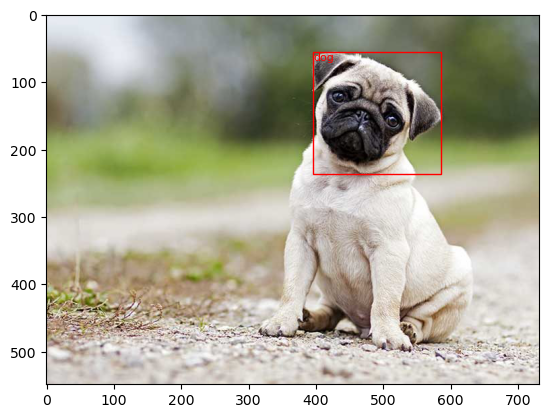

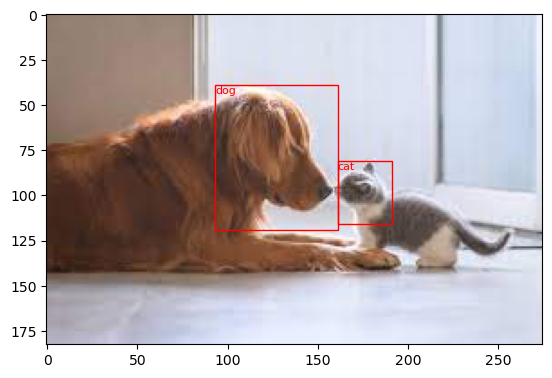

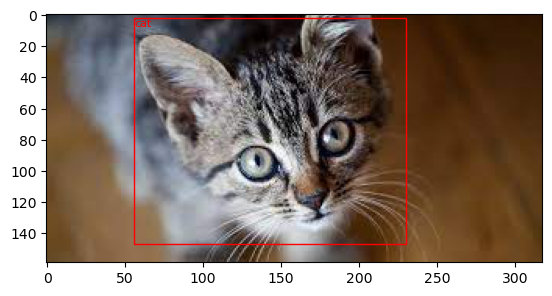

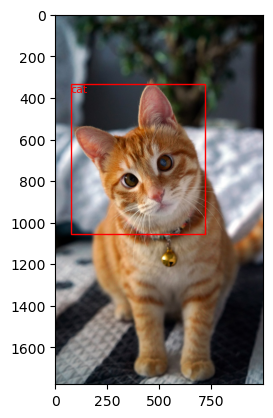

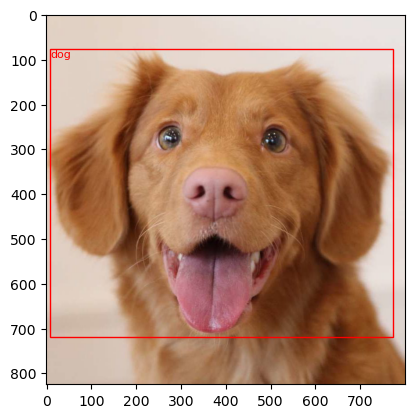

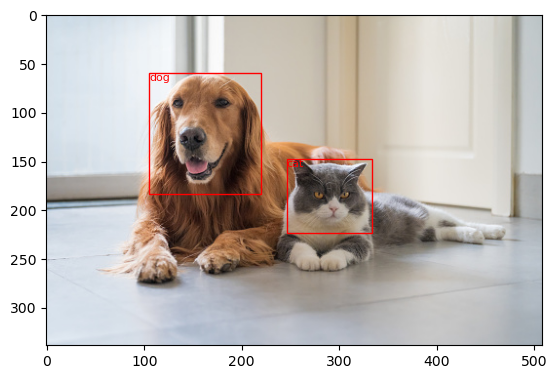

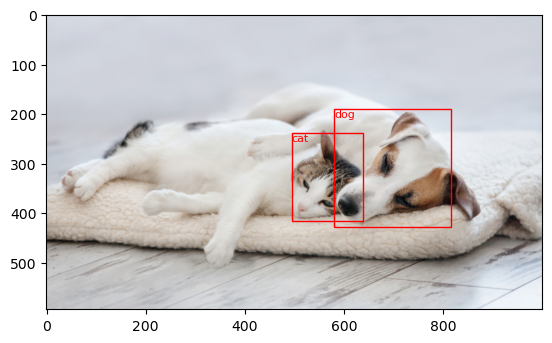

In [27]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Path to the JSON file
json_file = 'cat_dog_annotation.json'

# Load JSON data
with open(json_file, 'r') as f:
    json_data = json.load(f)

# Specify the path to the images
image_folder = r'C:/Users/Faisal/Downloads/cat_dog_json/cat_dog'

# Iterate over images in the JSON data
for image_id, image_data in json_data['_via_img_metadata'].items():
    # Load image
    image_filename = image_data['filename']
    image_path = os.path.join(image_folder, image_filename)
    image = Image.open(image_path)

    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(image)

    # Get bounding box information for the current image
    regions = image_data['regions']

    # Draw bounding boxes on the image
    for region in regions:
        label_name = region['region_attributes']['name']
        x = region['shape_attributes']['x']
        y = region['shape_attributes']['y']
        width = region['shape_attributes']['width']
        height = region['shape_attributes']['height']

        # Create a rectangle patch
        rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')

        # Add the rectangle to the current axes
        ax.add_patch(rect)

        # Add label text near the bounding box
        ax.text(x, y, label_name, color='r', fontsize=8, verticalalignment='top')

    # Show the image with bounding boxes
    plt.show()

## Augmentation using noise and brightness

In [31]:
from PIL import Image
import os
import random
import numpy as np
#from keras.preprocessing.image import ImageDataGenerator

#adding random brightness

#Define the path to the directory containing the images
images_dir = 'C:/Users/Faisal/Downloads/cat_dog_json/cat_dog'

#Define the path to the directory where the brightness-adjusted images will be saved
output_dir = 'C:/Users/Faisal/Downloads/cat_dog_json/brightness_augment'  # Replace with the actual path to your output directory
brightness_factor_range = (0.5, 1.5)

# Iterate over the images in the input directory
for filename in os.listdir(images_dir):
    if filename.endswith(('.jpeg','.jpg')):
        # Load the image
        image_path = os.path.join(images_dir, filename)
        image = Image.open(image_path)

        # Generate 5 variations of the image with random brightness factors
        for i in range(5):
            # Randomly adjust the brightness of the image
            brightness_factor = random.uniform(*brightness_factor_range)
            brightened_image = image.point(lambda x: x * brightness_factor)

            # Save the brightness-adjusted image to the output directory with a filename that includes the brightness factor
            output_filename = f'{os.path.splitext(filename)[0]}brightness{brightness_factor:.2f}.jpeg'
            output_path = os.path.join(output_dir, output_filename)
            brightened_image.save(output_path)

#adding noise
# Define the path to the directory containing the images
images_dir = 'C:/Users/Faisal/Downloads/cat_dog_json/cat_dog'  # Replace with the actual path to your images directory

# Define the path to the directory where the noise-added images will be saved
output_dir = 'C:/Users/Faisal/Downloads/cat_dog_json/noise_augment'  # Replace with the actual path to your output directory

# Define the noise factor range (values between 0 and 1)
noise_factor_range = (0.1, 0.5)

# Iterate over the images in the input directory
for filename in os.listdir(images_dir):
    if filename.endswith(('.jpeg','.jpg')):
        # Load the image
        image_path = os.path.join(images_dir, filename)
        image = Image.open(image_path)
        
        # Generate 5 variations of the image with random noise factors
        for i in range(5):
            # Randomly generate a noise factor
            noise_factor = random.uniform(*noise_factor_range)
            # Convert the image to a NumPy array
            image_array = np.array(image)
            # Generate random noise with the same shape as the image
            noise = np.random.normal(scale=noise_factor, size=image_array.shape)

            # Add the noise to the image
            noisy_image_array = image_array + noise

            # Clip the pixel values to the valid range (0-255)
            noisy_image_array = np.clip(noisy_image_array, 0, 255)

            # Convert the NumPy array back to an image
            noisy_image = Image.fromarray(noisy_image_array.astype('uint8'))

            # Save the noise-added image to the output directory with a filename that includes the noise factor
            output_filename = f'{os.path.splitext(filename)[0]}noise{int(noise_factor * 100)}.jpeg'
            output_path = os.path.join(output_dir, output_filename)
            noisy_image.save(output_path)


## Task-4 Augmentation of Resizng images

In [35]:
from PIL import Image
import os

# Set the resize factors
resize_factors = [0.5, 2, 3]

# Set the path to the folder containing the images
image_folder = 'C:/Users/Faisal/Downloads/cat_dog_json/cat_dog'

# Set the output folder to save the augmented images
output_folder = 'C:/Users/Faisal/Downloads/cat_dog_json/resize_augment'

# Iterate over each image in the folder
for filename in os.listdir(image_folder):
    # Get the file extension
    file_ext = os.path.splitext(filename)[1]
    # Check if the file is an image
    if file_ext.lower() in ['.jpeg', '.jpg']:
        # Load the image
        image = Image.open(os.path.join(image_folder, filename))

        # Iterate over each resize factor
        for factor in resize_factors:
            # Calculate the new dimensions
            new_width = int(image.width * factor)
            new_height = int(image.height * factor)

            # Resize the image
            resized_image = image.resize((new_width, new_height))

            # Save the resized image with a new filename
            new_filename = f'{os.path.splitext(filename)[0]}_{factor}size{file_ext}'
            resized_image.save(os.path.join(output_folder, new_filename))
